In [1]:
import ccxt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
exchange_binance = ccxt.binanceusdm()
exchange_binance_2 = ccxt.binance()

In [41]:
column_name = ['time', 'open', 'high', 'low', 'close', 'volume']
unfi_df = pd.DataFrame(exchange_binance.fetch_ohlcv(symbol='UNFI/USDT', timeframe='4h',limit=500),columns=column_name)['close']
uni_df = pd.DataFrame(exchange_binance.fetch_ohlcv(symbol='UNI/USDT',timeframe='4h',limit=500),columns=column_name)['close']
unfi_df = np.log(unfi_df/unfi_df[0])
uni_df = np.log(uni_df/uni_df[0])
spread = unfi_df - uni_df

unfi_df_logrt = unfi_df.pct_change()
uni_df_logrt = uni_df.pct_change()

In [39]:
defi_df = pd.DataFrame(exchange_binance.fetch_ohlcv(
    symbol='DEFI/USDT', timeframe='4h', limit=1000), columns=column_name)['close']
yfii_df = pd.DataFrame(exchange_binance.fetch_ohlcv(
    symbol='YFII/USDT', timeframe='4h', limit=1000), columns=column_name)['close']
defi_df = np.log(defi_df/defi_df[0])
yfii_df = np.log(yfii_df/yfii_df[0])
spread_1 = defi_df - yfii_df

#defi_df_logrt = defi_df.pct_change()
#yfii_df_logrt = yfii_df.pct_change()


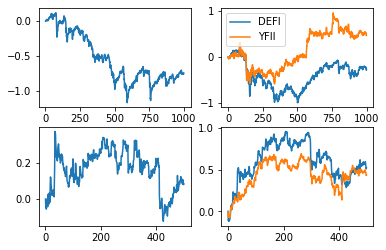

In [42]:
plt.subplot(2,2,1)
plt.plot(spread_1)

plt.subplot(2,2,2)
plt.plot(defi_df , label = 'DEFI')
plt.plot(yfii_df, label = 'YFII')
plt.legend()

plt.subplot(2,2,3)
plt.plot(spread)

plt.subplot(2,2,4)
plt.plot(unfi_df)
plt.plot(uni_df)


In [6]:
from statsmodels.tsa.stattools import adfuller
adfuller(x=spread)

(-2.953612687818084,
 0.039459378843788875,
 0,
 499,
 {'1%': -3.4435228622952065,
  '5%': -2.867349510566146,
  '10%': -2.569864247011056},
 -2147.8823200601546)

In [7]:
import statsmodels.api as sm

dfy = uni_df.values
dfx = sm.add_constant(unfi_df.values)

linear = sm.OLS(dfy, dfx)
result = linear.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1924.
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          3.40e-173
Time:                        10:47:09   Log-Likelihood:                 585.70
No. Observations:                 500   AIC:                            -1167.
Df Residuals:                     498   BIC:                            -1159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0405      0.010      4.214      0.000       0.022       0.059
x1             0.6603      0.015     43.869      0.000       0.631       0.690
==============================================================================
Omnibus:                        1.032   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.872
Skew:                           0.093   Prob(JB):                        0.646
Kurtosis:                       3.086   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
dfy = defi_df.values
dfx = sm.add_constant(yfii_df.values)

linear = sm.OLS(dfy, dfx)
result = linear.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     382.4
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           2.39e-72
Time:                        11:26:59   Log-Likelihood:                -9.2548
No. Observations:                1000   AIC:                             22.51
Df Residuals:                     998   BIC:                             32.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4491      0.008    -54.592      0.000      -0.465      -0.433
x1             0.3877      0.020     19.556      0.000       0.349       0.427
==============================================================================
Omnibus:                       74.994   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.813
Skew:                           0.735   Prob(JB):                     1.91e-20
Kurtosis:                       3.141   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

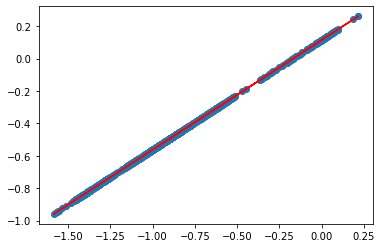

In [23]:
uni_df = (0.6774)*(unfi_df)+(0.1153)

plt.scatter(unfi_df,uni_df)
plt.plot(unfi_df.values, uni_df.values, color='r')
plt.show()

In [10]:
import statsmodels.api as sm

uni_df_logrt = uni_df_logrt[2:]*0.6774
unfi_df_logrt = unfi_df_logrt[2:]
dfy = uni_df_logrt.values
dfx = sm.add_constant(unfi_df_logrt.values)

linear = sm.OLS(dfy, dfx)
result = linear.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     197.2
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           5.86e-38
Time:                        10:47:10   Log-Likelihood:                 304.38
No. Observations:                 498   AIC:                            -604.8
Df Residuals:                     496   BIC:                            -596.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.006     -0.267      0.790      -0.013       0.010
x1             0.3824      0.027     14.043      0.000       0.329       0.436
==============================================================================
Omnibus:                      657.662   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           279492.559
Skew:                          -6.051   Prob(JB):                         0.00
Kurtosis:                     118.426   Cond. No.                         4.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

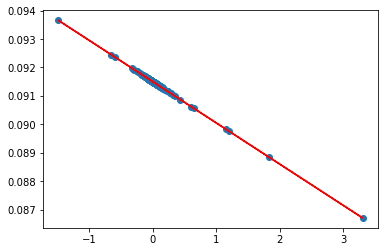

In [11]:
uni_df_logrt = (-0.00145)*(unfi_df_logrt)+(0.0915)

plt.scatter(unfi_df_logrt, uni_df_logrt)
plt.plot(unfi_df_logrt.values, uni_df_logrt.values, color='r')
plt.show()


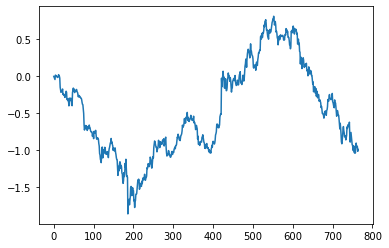

In [35]:
column_name = ['time', 'open', 'high', 'low', 'close', 'volume']
unfi_df = pd.DataFrame(exchange_binance.fetch_ohlcv(
    symbol='BTC/USDT', timeframe='1d', limit=1000), columns=column_name)['close']
uni_df = pd.DataFrame(exchange_binance_2.fetch_ohlcv(
    symbol='BTC/USDT', timeframe='1d', limit=1000), columns=column_name)['close']
unfi_df = np.log(unfi_df/unfi_df[0])
uni_df = np.log(uni_df/uni_df[0])
spread = (unfi_df - uni_df)

unfi_df_logrt = unfi_df.pct_change()
uni_df_logrt = uni_df.pct_change()

plt.plot(spread)
